__원활한 채점을 위하여 notebook을 html로 저장하여 제출하시오__

__파일명은 HW2_학번_이름   으로 저장할 것__

먼저 다음 데이터를 로딩하시오

In [344]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [345]:
data = pd.read_csv('hw2data.txt',
                   header=None, names = ('feature1','feature2','y_label'))
data.head()

,feature1,feature2,y_label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [346]:
data.shape

(100, 3)

### 1번 feature1, feature2 를 X 로, y_label을 y 로 하여  scatter plot 을 이용하여 y값에 따라 색깔을 달리 하여 그래프로 그리시오.

In [347]:
X = data.iloc[:,:2].values
Y = data.iloc[:,2].values

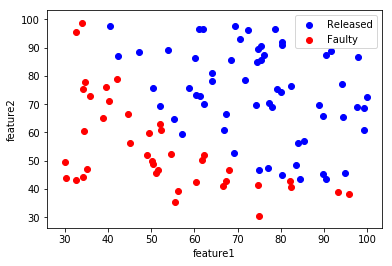

In [348]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Faulty')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend();

### 2번 Gradient Descent를 이용하여, 직접 $\theta$ 값'들'을 구해보자.

하나의 샘플에서 cost는 다음과 같았다. 
$$
{  \text{cost} =
  \begin{cases}
    -\log(h_\theta(x))      & \quad \text{if }y=1\\
     -\log(1-h_\theta(x))   & \quad \text{if }y=0
  \end{cases}
}
$$
100 개의 샘플을 위 cost의 모든 샘플의 평균이라고 하자 (cost의 합 나누기 샘플 수)

numpy array를 적극 활용하여 sum을 마지막에 구하는게 이상적이나, 직접 100개의 합을 구해도 된다. 

linear regression의 GD와 오늘 배운 미분식을 이용하여, learning rate 0.1로 하고, step size를 500으로 하여, $\theta$들을 구해보자.

(초기 값이 다 다르므로, 모든 학생들의 $ \theta $는 상이할 것이라고 예상한다. )

In [349]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import *

In [350]:
X0 = np.ones(len(Y));
X0 = X0.reshape(-1,1);
X = np.hstack((X0,X));

In [351]:
print(X,Y)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

theta값 초기화

In [352]:
def init_theta():
    #-20 부터 20까지의 랜덤 변수
    theta0 = random()*40.-20.;
    theta1 = random()*40.-20.;
    theta2 = random()*40.-20.;
    
    return theta0,theta1,theta2;

sigmoid 함수 정의

In [353]:
def sigmoid(x):
    return np.longdouble(1/(1+np.exp(-x)));

cost 함수 정의

In [354]:
def compute_cost(theta0, theta1,theta2, X,Y):
    total_cost = 0;
    N =0; #코스트 값을 나눌때 자동형변환을 방지하기위해 float로 형변환
    
    for i in range(len(Y)):
        x0 = X[i,0];
        x1 = X[i,1];
        x2 = X[i,2];
        y = Y[i];
        total_cost += (-y*math.log(sigmoid(theta0*x0 + theta1*x1 + theta2 * x2)+0.000001)
                             - (1-y)*math.log(1.000001-sigmoid(theta0*x0 + theta1*x1 + theta2 * x2))); 
    
        N+=1;
    return total_cost/N; #에러값의 제곱값의 합을 개수로 나눈것을 코스트값이라 정의한다

In [355]:
theta0,theta1,theta2 = init_theta();
print(theta0,theta1,theta2);
print(compute_cost(theta0,theta1,theta2,X,Y))

-5.344688935826877 -19.66878140924677 -5.767459332965309
8.289305934778756


In [356]:
def step_gradient(theta0_current, theta1_current,theta2_current, X,Y, learing_rate):
    theta0_gradient = 0;
    theta1_gradient = 0;
    theta2_gradient = 0;
    N = float(len(Y));
    
    #현재 m,n 값에서의 기울기(경사도)를 구한다
    for i in range(len(Y)):
        x0 = X[i,0];
        x1 = X[i,1];
        x2 = X[i,2];
        y = Y[i];
        theta0_gradient += (1/N)*(sigmoid(theta0*x0 + theta1*x1 + theta2 * x2)-y)*x0;
        theta1_gradient += (1/N)*(sigmoid(theta0*x0 + theta1*x1 + theta2 * x2)-y)*x1;
        theta2_gradient += (1/N)*(sigmoid(theta0*x0 + theta1*x1 + theta2 * x2)-y)*x2;
        
        
    #위에서 구한 경사도에 따라 경사를 따라 내려간다
    theta0_updated = theta0_current - learing_rate * theta0_gradient;
    theta1_updated = theta1_current - learing_rate * theta1_gradient;
    theta2_updated = theta2_current - learing_rate * theta2_gradient;
    
    return theta0_updated, theta1_updated,theta2_updated; #업데이트 된 값을 반환한다

In [357]:
def gradient_descent_runner(X,Y, starting_theta0, starting_theta1,starting_theta2, learning_rate, num_iterations):
    #초기값으로 부터 gradient descent를 실행한다
    theta0 = starting_theta0;
    theta1 = starting_theta1;
    theta2 = starting_theta2;
    
    #원하는 반복 수 만큼 경사를 따라 내려간다
    for i in range(num_iterations):
         #현재 m,n,points에 따른 코스트 값
        theta0, theta1,theta2 = step_gradient(theta0, theta1,theta2, X,Y, learning_rate); #경사를 내려가는 스텝
    cost = compute_cost(theta0, theta1,theta2, X,Y);   
    return [theta0, theta1,theta2,cost]

In [358]:
learning_rate = 0.01     # hyper parameter: alpha
num_iterations = 5000    # hyper parameter: number of steps 
init_theta0 ,init_theta1,init_theta2 =  init_theta();
gd_iterations = 10; #GD를 반복하는 횟수 

#각 gd스텝을 저장할 theta의 리스트
theta0_list = [];
theta1_list = [];
theta2_list = [];
cost_list = [];

#0번째 값
theta0_list.append(init_theta0);
theta1_list.append(init_theta1);
theta2_list.append(init_theta2);

for i in range(gd_iterations):
    theta0, theta1,theta2 , cost = gradient_descent_runner(X,Y, init_theta0,init_theta1,init_theta2, learning_rate, num_iterations)
    theta0_list.append(theta0);
    theta1_list.append(theta1);
    theta2_list.append(theta2);
    cost_list.append(cost);
    
    init_theta0 = theta0;
    init_theta1 = theta1;
    init_theta2 = theta2;

  

In [359]:
print(theta0_list)
print(theta1_list)
print(theta2_list)

[11.253815189769504, 41.25381518977064, 21.25381518977218, 1.2538151897717449, -18.746184810227856, 11.253815189772835, -8.74618481022585, -28.74618481022931, 1.2538151897715593, -18.74618481022804, -38.746184810228726]
[8.490649052644187, 2250.058329950319, 1209.4123079815436, 168.76628601300274, -871.8797359554688, 1369.687944942116, 329.0419229734996, -711.6040989949839, 1529.963581902601, 489.31755993389686, -551.3284620345867]
[-15.354735626627924, 2203.3373268521777, 1110.9294849251078, 18.521642997938805, -1073.8861989292361, 1144.8058635493594, 52.39802162219594, -1040.0098203049845, 1178.6822421736113, 86.27440024645259, -1006.1334416807326]


In [360]:
print(cost_list)  

[5.526203623218912, 5.526203623218912, 5.526203623218912, 8.289305934778756, 5.526203623218912, 5.526203623218912, 8.289305934778756, 5.526203623218912, 5.526203623218912, 8.289305934778756]


[-10.47, -10.711999176777697] [15.83, 15.606873092374174] [2.34, 2.3753159261501366]
0.45801738981418183 / 러닝레이트 0.001 반복 5000

[-10.47, -11.28805933955792] [15.83, 14.554738039523885] [2.34, 3.7177528618641453]
0.3944244194109798 / 러닝레이트 0.001 반복 5000

### 3. 위에서 구한 $\theta$들을 이용하여 decision boundary를 그려보자. 
왜 그렇게 그리게 되었는지 서술하시오. 

### 4. Stochastic Gradient Decsent 란 GD를 빠르게 수행하는 알고리즘으로 샘플 100개를 다 방문하는게 아니라 각 스텝별 임의로 샘플을 하나 골라 GD를 수행하는 알고리즘이다. SGD로 2번을 반복하시오.